# Tutorial

### Instructions

In this tutorial, you will be creating a classifcation model. The data were collected from the Taiwan Economic Journal for the years 1999 to 2009. Company bankruptcy was defined based on the business regulations of the Taiwan Stock Exchange. Apply what you have learnt and come up with the optimal model to predict if a company goes bankrupt or not. 

Bonus: Determine what are the key features that influence your model. 

 PS: If you find a technique/method that you believe was not shared in class but useful; you can and should use it. No points will be deducted for trying! Do not delete your trial scripts, these will be important for you to understand where you improved from your previous attempts.



In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import precision_recall_curve
import numpy as np


In [35]:
# Read data set 
data = pd.read_csv('datasets/data.csv')

In [36]:
# Display the first few rows of the dataset to understand its structure
data.head(), data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

(   Bankrupt?   ROA(C) before interest and depreciation before interest  \
 0          1                                           0.370594          
 1          1                                           0.464291          
 2          1                                           0.426071          
 3          1                                           0.399844          
 4          1                                           0.465022          
 
     ROA(A) before interest and % after tax  \
 0                                 0.424389   
 1                                 0.538214   
 2                                 0.499019   
 3                                 0.451265   
 4                                 0.538432   
 
     ROA(B) before interest and depreciation after tax  \
 0                                           0.405750    
 1                                           0.516730    
 2                                           0.472295    
 3                              

In [37]:
# Check the distribution of the target variable (Bankrupt?)
target_distribution = data['Bankrupt?'].value_counts(normalize=True) * 100

# Display the target distribution
target_distribution

Bankrupt?
0    96.77372
1     3.22628
Name: proportion, dtype: float64

In [38]:
# Define features (X) and target (y)
X = data.drop(columns=['Bankrupt?'])
y = data['Bankrupt?']

# Stratified train-test split to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Shapes of the resulting datasets
X_train_scaled.shape, X_test_scaled.shape, y_train.shape, y_test.shape

# Training set: 5,455 samples, 95 features.
# Testing set: 1,364 samples, 95 features.

((5455, 95), (1364, 95), (5455,), (1364,))

In [39]:
# Train a Logistic Regression model with class balancing
log_reg = LogisticRegression(class_weight='balanced', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model using classification metrics
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Bankrupt", "Bankrupt"]))

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")


Classification Report:
              precision    recall  f1-score   support

Non-Bankrupt       0.99      0.88      0.93      1320
    Bankrupt       0.18      0.80      0.30        44

    accuracy                           0.88      1364
   macro avg       0.59      0.84      0.61      1364
weighted avg       0.97      0.88      0.91      1364

ROC-AUC Score: 0.9126033057851239


c:\Users\zarap\Desktop\DAC-Curriculum\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
# Initialize the Random Forest Classifier with balanced class weights
rf_model = RandomForestClassifier(
    n_estimators=100,         # Number of trees
    random_state=42,          # For reproducibility
    class_weight='balanced'   # Handle class imbalance
)

# Train the model on the scaled training data
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test_scaled)
y_pred_proba = rf_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Bankrupt", "Bankrupt"]))

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display the top 10 features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))



Classification Report:
              precision    recall  f1-score   support

Non-Bankrupt       0.97      1.00      0.99      1320
    Bankrupt       0.64      0.20      0.31        44

    accuracy                           0.97      1364
   macro avg       0.81      0.60      0.65      1364
weighted avg       0.96      0.97      0.96      1364

ROC-AUC Score: 0.9369146005509641
Top 10 Important Features:
                                     Feature  Importance
39                      Borrowing dependency    0.055201
9       Continuous interest rate (after tax)    0.045160
85                Net Income to Total Assets    0.040956
67         Retained Earnings to Total Assets    0.039148
90                       Liability to Equity    0.038644
68                Total income/Total expense    0.038122
18   Persistent EPS in the Last Four Seasons    0.036249
36                              Debt ratio %    0.035785
37                          Net worth/Assets    0.032197
89        Net Incom

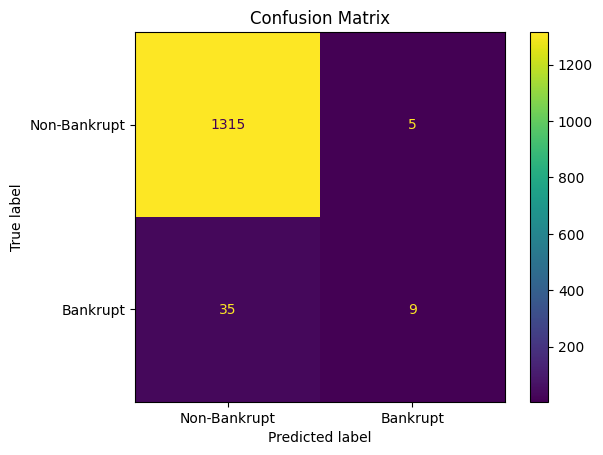

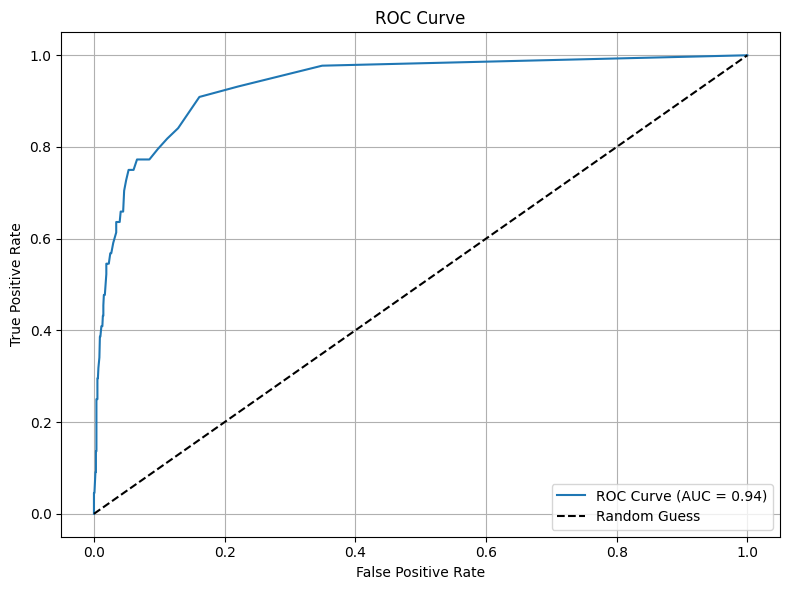

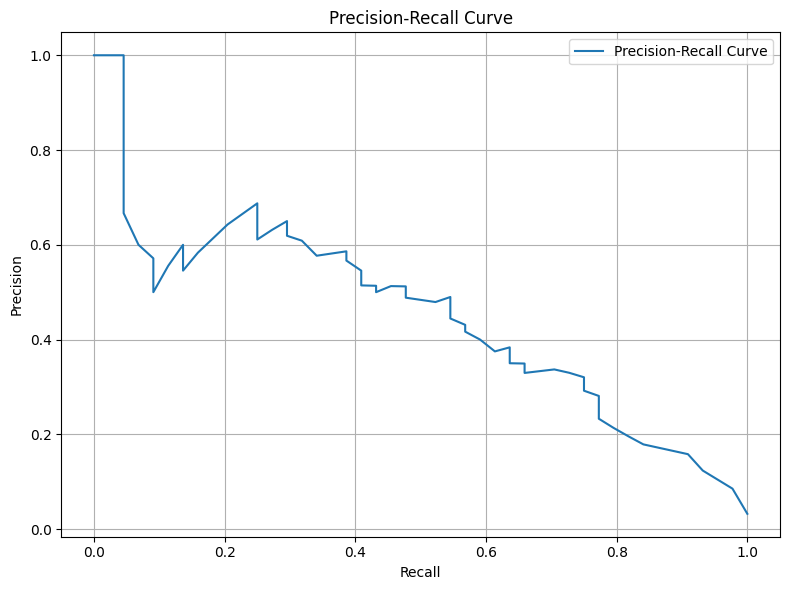

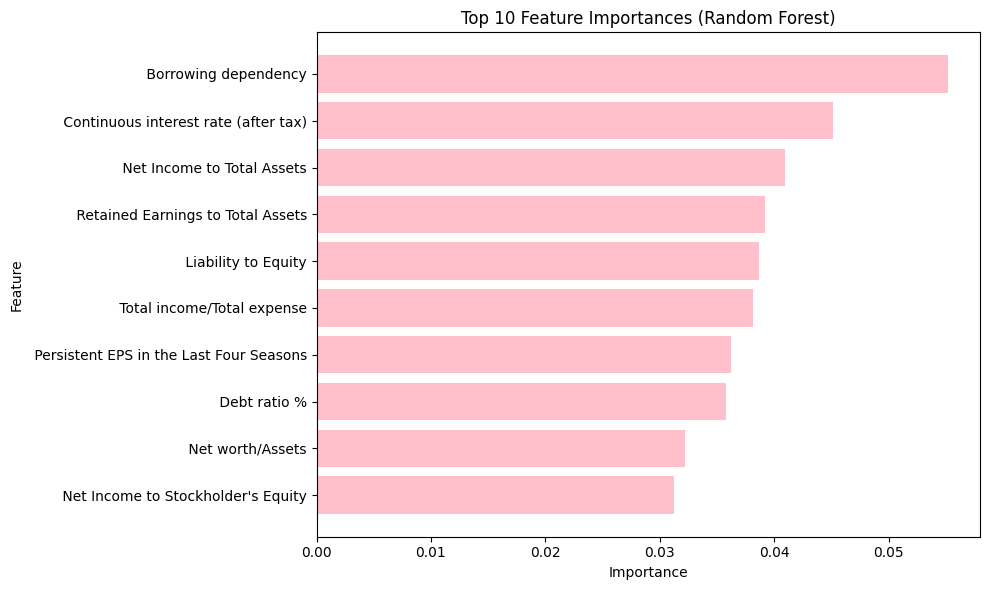

In [41]:
# Plot the confusion matrix
ConfusionMatrixDisplay.from_estimator(rf_model, X_test_scaled, y_test, display_labels=["Non-Bankrupt", "Bankrupt"])
plt.title("Confusion Matrix")
plt.show()

# Get feature importances
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()

from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Get feature importances from the trained Random Forest model
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Select the top 10 features
top_features = feature_importance_df.head(10)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='pink')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()
